In [1]:
from dataloader_class import *

In [2]:
dl = data_loader('data/covid2020.csv')

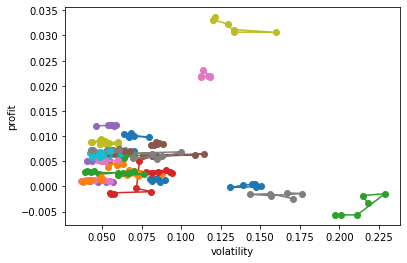

In [3]:
dl.split_windows(60)
dl.plot_trajectories()

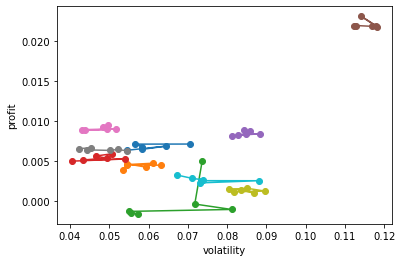

In [4]:
dl.filter_assets(num_assets=10, method='relevant')
dl.plot_trajectories()

In [5]:
mut = dl.return_mut()

In [6]:
sigmat = dl.return_sigmat()

In [7]:
stdt = dl.return_stdt()

# Starting with a simple Hamiltonian

In [37]:
import flatnetwork_simple as fns

In [38]:
L = [6,10,2]
d = 3

mu = lambda t,i: mut[t,i]
rho = 5.0

fnet = fns.FlatNetwork(L,d)
fnet.loadParams(mu, rho)
fnet.make_mpos()

S, D = fnet.getHamiltonian()

Max MPO dim:  41


In [45]:
sweepD = [     1,     2,     2,     3,     3,     4,     5,     8,    10]
sweepI = [    10,    10,    10,    10,    10,    10,    10,    10,    10]
sweepN = [1.0e-2,1.0e-3,1.0e-4,1.0e-5,1.0e-6,1.0e-6,1.0e-6,1.0e-6,1.0e-6]
sweepM = [     5,     5,     5,     5,     5,     5,     5,     5,     5]
e, mps = fnet.run(sweepd = sweepD, sweepi = sweepI, sweepn = sweepN, sweepmin = sweepM)

Schedule:  0  D =  1
Beginning sweep:  0 of 10
Sweep Energy: -14.28892910
Beginning sweep:  1 of 10
Sweep Energy: -15.09295119
Beginning sweep:  2 of 10
Sweep Energy: -15.09295119
Beginning sweep:  3 of 10
Sweep Energy: -15.09295119
Beginning sweep:  4 of 10
Sweep Energy: -15.09295119
Beginning sweep:  5 of 10
Sweep Energy: -15.09295119
-----------
Schedule:  1  D =  2
Beginning sweep:  0 of 10
Sweep Energy: -15.77388876
Beginning sweep:  1 of 10
Sweep Energy: -19.53361300
Beginning sweep:  2 of 10
Sweep Energy: -21.75541135
Beginning sweep:  3 of 10
Sweep Energy: -22.22673070
Beginning sweep:  4 of 10
Sweep Energy: -23.03294576
Beginning sweep:  5 of 10
Sweep Energy: -23.78355908
Beginning sweep:  6 of 10
Sweep Energy: -25.02800628
Beginning sweep:  7 of 10
Sweep Energy: -25.77433693
Beginning sweep:  8 of 10
Sweep Energy: -26.44242819
Beginning sweep:  9 of 10
Sweep Energy: -26.76958495
-----------
Schedule:  2  D =  2
Beginning sweep:  0 of 10
Sweep Energy: -26.76958495
Beginning sw

In [59]:
fvs = fnet.computeWeights(mps)

In [ ]:
fvm = np.zeros([L[1],L[0]])

for pair in fvs:
    fvm[pair[1],pair[0]] = fvs[pair]
    if(abs(fvs[pair]>1.0e-8)):
        print(pair, fvs[pair], mu(pair[0],pair[1])))

In [61]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Weight')

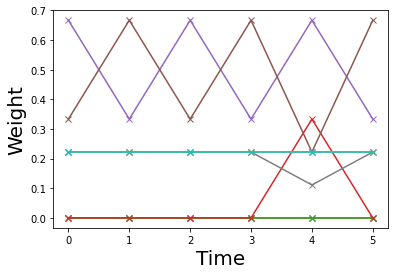

In [62]:
ts = [t for t in range(0,L[0])]

for i in range(L[1]):
    plt.plot(ts,fvm[i,:],'-x')
plt.xlabel('Time', fontsize=20)
plt.ylabel('Weight', fontsize=20)

Text(0, 0.5, 'Relative Profit')

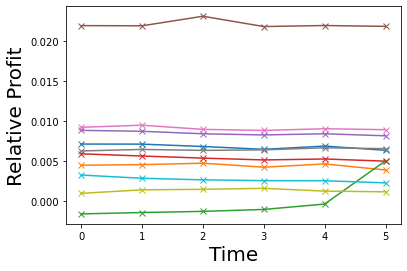

In [63]:
for i in range(L[1]):
    plt.plot(ts,mut[:,i],'-x')
    
plt.xlabel('Time', fontsize=20)
plt.ylabel('Relative Profit', fontsize=20)

# Going then to Full Hamiltonian

In [51]:
import flatnetwork as ffns

In [52]:
L = [6,10,2]
d = 3

mu = lambda t,i: mut[t,i]
Sig = lambda t,i,j: sigmat[t,i,j]
lam = lambda t,i: 0.001
ga = 10.0
rho = 100.0

ffnet = ffns.FlatNetwork(L,d)
ffnet.loadParams(mu, lam, Sig, rho, ga)
ffnet.make_mpos()

fS, fD = ffnet.getHamiltonian()

Max MPO dim:  41
\Delta: 0.8888888888888888 Min rho:  0.2962962962962963 Supplied rho:  1000.0


In [53]:
sweepD = [     1,     2,     2,     3,     3,     4,     5,     8,    10]
sweepI = [    10,    10,    10,    10,    10,    10,    10,    10,    10]
sweepN = [1.0e-2,1.0e-3,1.0e-4,1.0e-5,1.0e-6,1.0e-6,1.0e-6,1.0e-6,1.0e-6]
sweepM = [     5,     5,     5,     5,     5,     5,     5,     5,     5]

fe, fmps = ffnet.run(sweepd = sweepD, sweepi = sweepI, sweepn = sweepN, sweepmin = sweepM)

Schedule:  0  D =  1
Beginning sweep:  0 of 10
Sweep Energy: -429.67666028
Beginning sweep:  1 of 10
Sweep Energy: -829.69550430
Beginning sweep:  2 of 10
Sweep Energy: -1001.33782644
Beginning sweep:  3 of 10
Sweep Energy: -1179.00198760
Beginning sweep:  4 of 10
Sweep Energy: -1378.15477675
Beginning sweep:  5 of 10
Sweep Energy: -1416.66981741
Beginning sweep:  6 of 10
Sweep Energy: -1432.74094817
Beginning sweep:  7 of 10
Sweep Energy: -1432.74094817
-----------
Schedule:  1  D =  2
Beginning sweep:  0 of 10
Sweep Energy: -1432.74094817
Beginning sweep:  1 of 10
Sweep Energy: -1432.74094817
Beginning sweep:  2 of 10
Sweep Energy: -1445.67751109
Beginning sweep:  3 of 10
Sweep Energy: -1480.29109751
Beginning sweep:  4 of 10
Sweep Energy: -1480.29109751
Beginning sweep:  5 of 10
Sweep Energy: -1485.43727171
Beginning sweep:  6 of 10
Sweep Energy: -1489.27648691
Beginning sweep:  7 of 10
Sweep Energy: -1490.03985686
Beginning sweep:  8 of 10
Sweep Energy: -1490.21408036
Beginning swe

In [54]:
ffvs = ffnet.computeWeights(fmps)

In [55]:
ffvm = np.zeros([L[1],L[0]])

for pair in ffvs:
    ffvm[pair[1],pair[0]] = ffvs[pair]
    if(abs(ffvs[pair]>1.0e-8)):
        print(pair, ffvs[pair], mu(pair[0],pair[1]), Sig(pair[0],pair[1],pair[1]))

(0, 0) 0.8888888888888766 0.0071180488484006935 0.2958686128274988
(0, 1) 0.7777777777777655 0.00447059155331772 0.23614989190530702
(0, 3) 0.6666666666666544 0.005897505093278455 0.15328895055837838
(0, 4) 0.2222222222222097 0.008831315432028851 0.42351690536741077
(0, 5) 0.2222222222222097 0.021922575365011913 0.8341327009109829
(0, 6) 0.11111111111109852 0.009211512033658668 0.1438452371343892
(0, 9) 0.2222222222222097 0.0032457235074933428 0.267215276322534
(1, 0) 0.8888888888888766 0.007107393173175401 0.19124865137252822
(1, 1) 0.7777777777777655 0.004544441543245608 0.1758279024664853
(1, 3) 0.6666666666666544 0.005620256351139115 0.1295106491732913
(1, 4) 0.2222222222222097 0.008712378977171741 0.4387694419141958
(1, 5) 0.222222222222216 0.02190051724304703 0.8489711725594385
(1, 6) 0.11111111111109695 0.009474482041204248 0.15038086156346928
(1, 9) 0.22222222222219704 0.00283845894537749 0.2976849702538271
(2, 0) 0.8888888888888624 0.006811190074631776 0.20409635109461124
(2, 

In [56]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Weight')

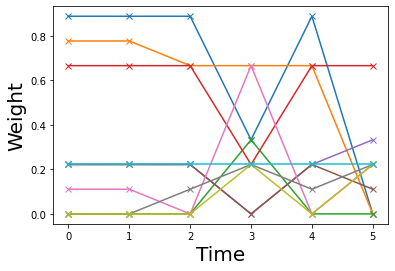

In [57]:
ts = [t for t in range(0,L[0])]

for i in range(L[1]):
    plt.plot(ts,ffvm[i,:],'-x')
plt.xlabel('Time', fontsize=20)
plt.ylabel('Weight', fontsize=20)

Text(0, 0.5, 'Relative Profit/Volatility')

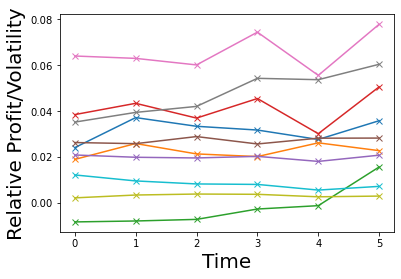

In [58]:
for i in range(L[1]):
    plt.plot(ts,mut[:,i]/sigmat[:,i,i],'-x')
    
plt.xlabel('Time', fontsize=20)
plt.ylabel('Relative Profit/Volatility', fontsize=20)